<a href="https://colab.research.google.com/github/kimsoll/Python/blob/main/%EB%B6%84%EB%A5%98%EC%99%80%EA%B5%B0%EC%A7%91%ED%99%94_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 9.1 분류와 군집화

### 9.2 k-NN 알고리즘에 사용할 견종의 표본 집합 시각화

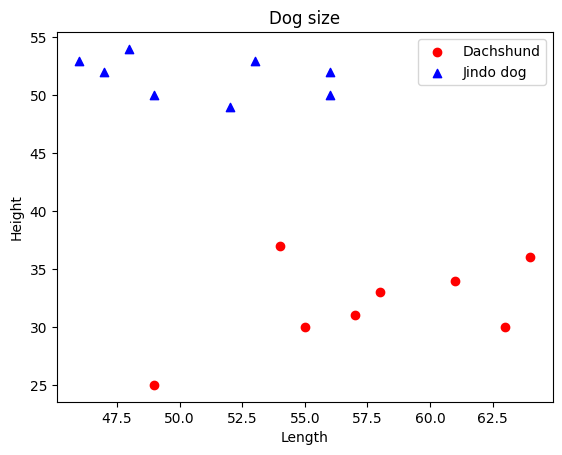

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

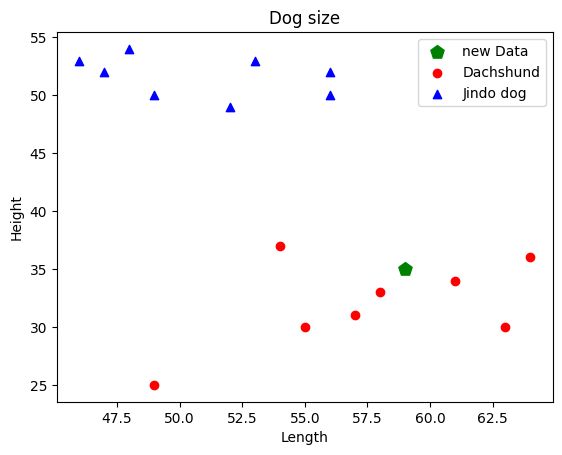

In [ ]:
newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')


### 9.3 k-NN 분류기를 실행하자

In [ ]:
import numpy as np


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

d_data = np.column_stack((dach_length, dach_height))

# 닥스훈트는 0으로 레이블링
d_label = np.zeros(len(dach_length))

# 진돗개는 1로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(jin_length))

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data), axis =0)
labels = np.concatenate((d_label, j_label))


dog_classes = {0:'닥스훈트', 1:'진돗개'}

In [ ]:
k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


In [ ]:
y_pred

array([0.])

#### 참고 코드 : kNN에서 이웃한 데이터를 얻는 코드

dist = [[2.23606798 2.23606798 4.47213595]] indexes = [[4 7 1]] dogs[indexes]= [[[58 33]
  [61 34]
  [57 31]]]
data = (16, 2)
index = (1, 3)
k = 3
데이터 [[59, 35]] , 판정 결과: 닥스훈트


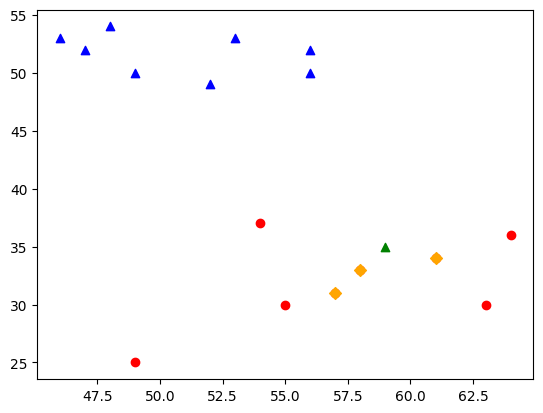

In [ ]:

distances, indexes = knn.kneighbors(newdata)

print('dist =', distances, 'indexes =', indexes, 'dogs[indexes]=', dogs[indexes])

def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], dogs[index][0][i][1], marker='D', color='orange')

plt.scatter(59, 35, color = 'green', marker='^')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

draw_neightbor(dogs, indexes, k)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

In [ ]:
distances, indexes = knn.kneighbors(newdata)
distances, indexes

(array([[2.23606798, 2.23606798, 4.47213595]]), array([[4, 7, 1]]))

In [ ]:
distances.shape

(1, 3)

In [ ]:
indexes, dogs[4]

(array([[4, 7, 1]]), array([58, 33]))

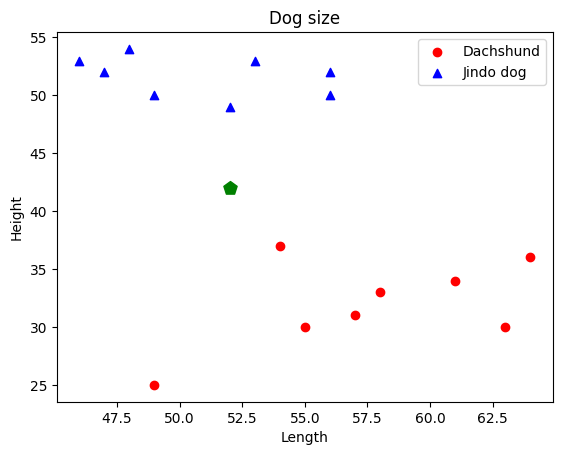

In [ ]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [52]    # 새로운 데이터의 길이
newdata_height = [42]    # 새로운 데이터의 높이

newdata = [[52, 42]]

# ...코드 생략
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')

In [ ]:
newdata = [[52, 42]]

k = 1     # k를 1으로 두고 kNN 분류기를 만들어 보자

In [ ]:
newdata = [[52, 42]]

k = 5     # k를 5으로 두고 kNN 분류기를 만들어 보자




distances, indexes = knn.kneighbors(newdata)
print('distances', distances, ', indexes:', indexes)
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
draw_neightbor(dogs, indexes, k)

In [ ]:
k = 9     # k를 3으로 두고 kNN 분류기를 만들어 보자


데이터 [[52, 42]] , 판정 결과: 진돗개


### 9.4 k-NN 활용 예제 - 붓꽃 데이터 준비하기

In [ ]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
#데이터 파악하기
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
iris.data[50:55, 2:]

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5]])

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
type(iris.feature_names)

list

In [ ]:
#데이터를 데이터 프레임으로 바꾸기
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#데이터 특성 파악하기
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
# 데이터 어레이(numpy) 로 바꾸기
arr = iris_df.values
iris_df.to_numpy()
#iris_df.columns

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

### 9.5 k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X = iris_df.iloc[:, :-1]
#X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]
#y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("테스트 세트 정확도: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


테스트 세트 정확도: 0.98


In [ ]:
# 데이터와 k값을 입력받아 knn으로 분류하고 score를 return하는 함수 만들기
def iris_knn(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  return metrics.accuracy_score(y_test, y_pred)


k = 3
scores = iris_knn(X, y, k)
print("테스트 세트 정확도: {:.2f}".format(scores))

테스트 세트 정확도: 0.98


### 9.6 새로운 데이터에 대하여 모델을 적용하고 분류



In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

k =3
iris = load_iris()

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(iris.data, iris.target)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# 새로운 데이터를 제시해 보자.
X = [[4, 2, 1.3, 0.4],
     [4, 3, 3.2, 2.2]]

y_pred = knn.predict(X)

print('X =', X[0],', 판정 결과:', classes[y_pred[0]])
print('X =', X[1],', 판정 결과:', classes[y_pred[1]])

X = [4, 2, 1.3, 0.4] , 판정 결과: setosa
X = [4, 3, 3.2, 2.2] , 판정 결과: versicolor


In [ ]:
# 모든 데이타로 모델 정확도에 대해서 알아보기
y_pred_all = knn.predict(iris.data)
print('테스트 세트 정확도: {:.2f}'.format(metrics.accuracy_score(iris.target, y_pred_all)))

테스트 세트 정확도: 0.96


In [ ]:
iris.target, y_pred_all

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

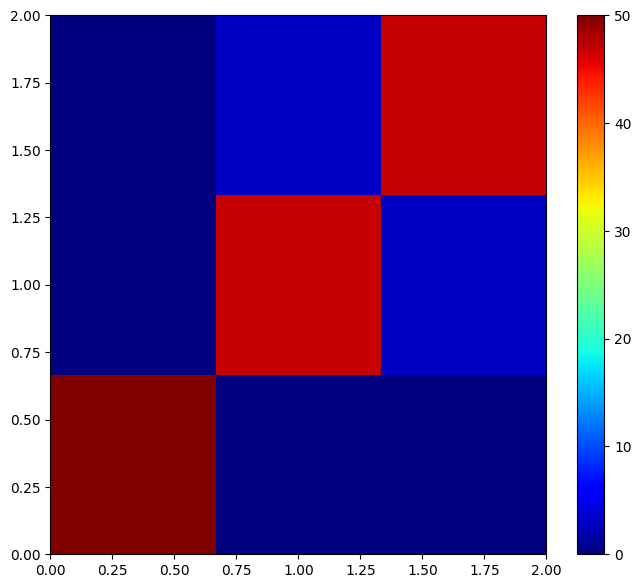

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,7))
h = plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

fig.colorbar(h[3])
plt.show()

In [ ]:
cmap=plt.cm.jet


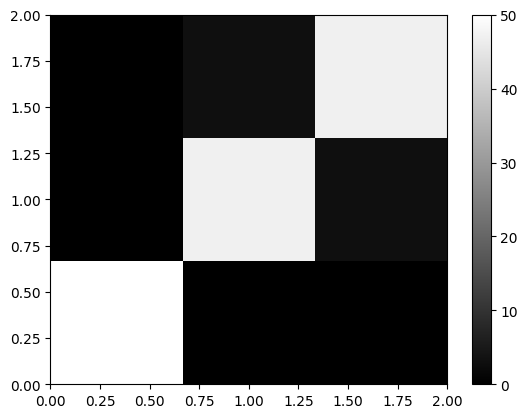

In [ ]:
 plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap='gray') #cool
 plt.colorbar()

## k-means

[링크 텍스트](https:// [링크 텍스트](https://))### 9.8 군집화 - K-means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


In [ ]:
game_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


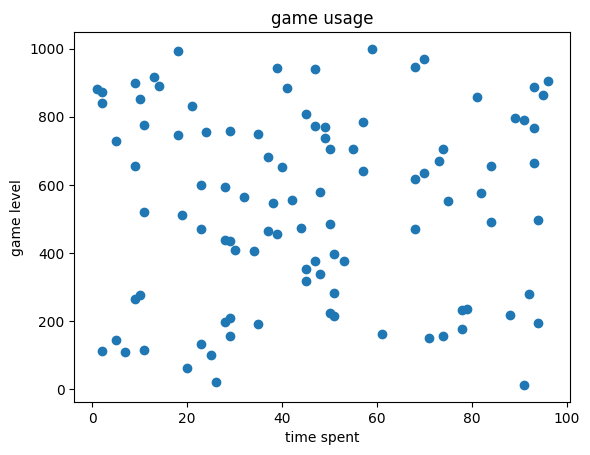

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.scatter(X,Y)
plt.xlabel('time spent')
plt.ylabel('game level')
plt.title('game usage')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


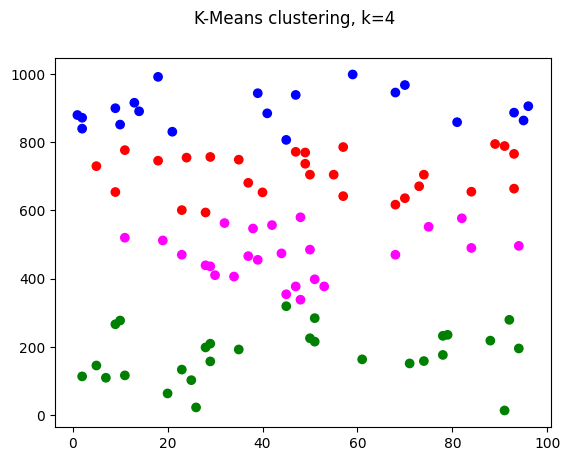

In [ ]:
# 데이터와 k값을 입력받아 k means으로 군집하고, 산점도 그래프를 그리는 함수 만들기
from sklearn import cluster

gamer_data = np.column_stack((X,Y))

model = cluster.KMeans(n_clusters=4)
model.fit(gamer_data)
labels = model.predict(gamer_data)

colors = np.array(['red', 'green', 'blue', 'magenta'])
plt.suptitle('K-Means clustering, k={}'.format(4))
plt.scatter(gamer_data[:, 0], gamer_data[:, 1], color= colors[labels])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


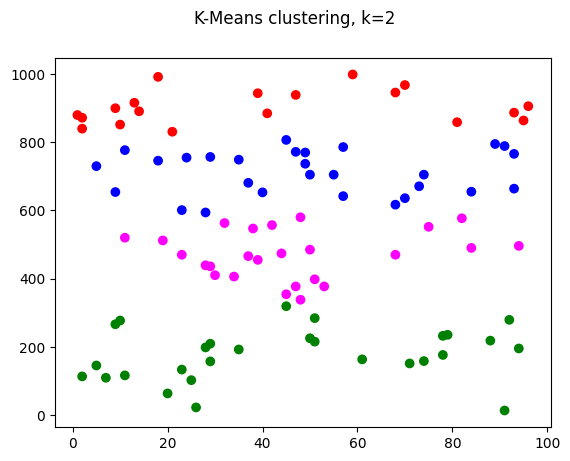

In [ ]:
# k=2
from sklearn import cluster

gamer_data = np.column_stack((X,Y))

def kmeans_predict_plot(X, k):
  model = cluster.KMeans(n_clusters=4)
  model.fit(X)
  labels = model.predict(X)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('K-Means clustering, k={}'.format(k))
  plt.scatter(X[:, 0], X[:, 1], color= colors[labels])

kmeans_predict_plot(gamer_data, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


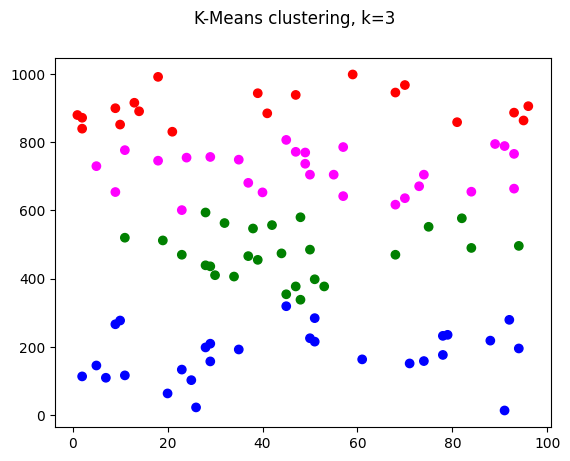

In [ ]:
# k=3과 k=4 그리기
kmeans_predict_plot(gamer_data, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


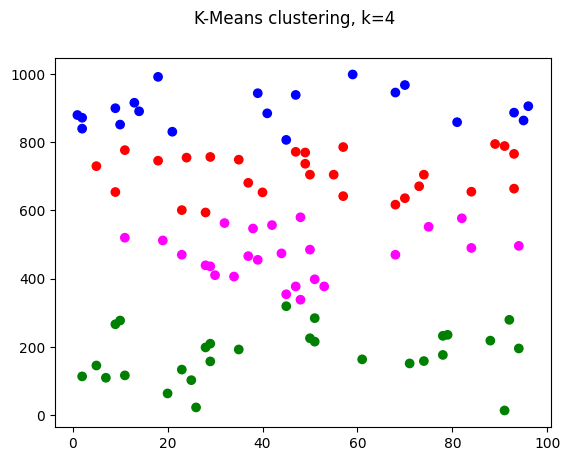

In [ ]:
kmeans_predict_plot(gamer_data, 4)

### 9.9 데이터 전처리의 필요성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')

In [2]:
# 아 그림을 X, y 축의 크기를 통일하여 다시 그리기
from sklearn import cluster

gamer_data = np.column_stack((X, Y))

model = cluster.KMeans(n_clusters=4)
model.fit(gamer_data)
labels = model.predict(gamer_data)

colors = np.array(['red', 'green', 'blue', 'magenta'])
plt.suptitle('k-Means clustering, k={}'.format(4))
plt.scatter(gamer_data[:, 0], gamer_data[:, 1], color=colors[labels])
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

NameError: name 'X' is not defined

In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
scaled_data = scaler.transform(gamer_data)

scaled_data[:, 0].mean(), scaled_data[:, 1].mean()

In [ ]:
# k=4 군집을 다시 실행하기
kmeans_predict_plot(scaled_data, 4)

In [ ]:
# 합계, 평균과 분산, 표준편차 구하기
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
a.sum(), a.mean(), a.var(), a.std()

In [ ]:
# 표준 스케일러로 군집하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(gamer_data)
sclaed_data = scaler.transform(gamer_data)

scaled_data[:, 0].std(), scaled_data[:, 1].std()

In [ ]:
scaled_data[:, 0].mean(), scaled_data[:, 1].mean()

In [ ]:
kmeans_predict_plot(scaled_data, 4)